In [ ]:
## Three-level risk thresholds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Database name mapping and corresponding thresholds
db_mapping = {
    'H1': {'db': 'GDPH', 'thr1': 0.090, 'thr2': 0.820, 'max_density': 0.06},  # Relative net benefit is positive
    'H2': {'db': 'SZBA', 'thr1': 0.100, 'thr2': 0.790, 'max_density': 0.06},  # Relative net benefit is positive
    'H3': {'db': 'MIMIC', 'thr1': 0.090, 'thr2': 0.750, 'max_density': 0.08}, # Relative net benefit is positive
}

# List of database names
db_names = ['H1', 'H2', 'H3']

# Modify data paths
cd = r'./'
cd2 = r'./7-SZBA_prospective/' 

db_name = 'H2'  # Select database name (choose one from H1, H2, H3)
is_external = False  # Whether it is external data

db_info = db_mapping[db_name]  # Get corresponding database information
db = db_info['db']  # Get database name
thr1 = db_info['thr1']  # Get corresponding thr1
thr2 = db_info['thr2']  # Get corresponding thr2
max_density = db_info['max_density']  # Get corresponding max_density

if db_name == 'H2':
    search_path1 = cd2 + '7.5-final_model/' + db + '/'  # Model results
else:
    search_path1 = cd + '5-final_model/' + db + '/'  # Model results

if is_external and db_name == 'H2':
    pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result_time_2.csv')
else:
    pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result.csv')

#### Filter out the medium-risk portion
risk_2 = pred_result[(pred_result['y_tepred'] > thr1) & (pred_result['y_tepred'] <= thr2)]  # Medium-risk


In [ ]:
low_thr_results = pd.DataFrame()  # Initialize results storage

# Iterate over each possible threshold
for thr in np.arange(0.01, 0.26, 0.01):  # Step size 0.01, can be adjusted as needed
    # Low risk subset: y_tepred <= threshold
    subset_low = pred_result[pred_result['y_tepred'] <= thr]
    r_low = pd.DataFrame({'Thr': [thr]})

    # Calculate the proportion of true positives
    if len(subset_low) > 0:
        true_positive_rate = subset_low['y_test'].sum() / len(subset_low)
    else:
        true_positive_rate = 0.0

    # Add proportion information to the result
    r_low['N'] = len(subset_low)
    r_low['Total N of low'] = len(pred_result)
    r_low['Proportion of low'] = len(subset_low) / len(pred_result)
    r_low['Death'] = subset_low['y_test'].sum()
    r_low['IHM'] = true_positive_rate

    # Concatenate results
    low_thr_results = pd.concat([low_thr_results, r_low], ignore_index=True)

print(low_thr_results)
# print(low_thr_results[low_thr_results['Proportion of low'] < 0.7])


     Thr     N  Total N of low  Proportion of low  Death       IHM
0   0.01  1333            8097           0.164629      7  0.005251
1   0.02  2248            8097           0.277634     11  0.004893
2   0.03  2893            8097           0.357293     14  0.004839
3   0.04  3511            8097           0.433617     17  0.004842
4   0.05  3991            8097           0.492899     22  0.005512
5   0.06  4404            8097           0.543905     28  0.006358
6   0.07  4746            8097           0.586143     31  0.006532
7   0.08  4993            8097           0.616648     33  0.006609
8   0.09  5213            8097           0.643819     34  0.006522
9   0.10  5403            8097           0.667284     34  0.006293
10  0.11  5545            8097           0.684822     40  0.007214
11  0.12  5674            8097           0.700753     41  0.007226
12  0.13  5803            8097           0.716685     43  0.007410
13  0.14  5906            8097           0.729406     45  0.00

In [ ]:
high_thr_results = pd.DataFrame()  # Initialize results storage

# Iterate over each possible threshold
for thr in np.arange(0.7, 0.91, 0.01):  # Step size 0.01, can be adjusted as needed
    # High risk subset: y_tepred > threshold
    subset_high = pred_result[pred_result['y_tepred'] > thr]
    r_high = pd.DataFrame({'Thr': [thr]})

    # Calculate the proportion of true positives
    if len(subset_high) > 0:
        true_positive_rate = subset_high['y_test'].sum() / len(subset_high)
    else:
        true_positive_rate = 0.0

    # Add proportion information to the result
    r_high['N'] = len(subset_high)
    r_high['Total N of high'] = len(pred_result)
    r_high['Proportion of high'] = len(subset_high) / len(pred_result)
    r_high['Death'] = subset_high['y_test'].sum()
    r_high['IHM'] = true_positive_rate

    # Concatenate results
    high_thr_results = pd.concat([high_thr_results, r_high], ignore_index=True)

print(high_thr_results)


     Thr    N  Total N of high  Proportion of high  Death       IHM
0   0.70  283             8097            0.034951     96  0.339223
1   0.71  270             8097            0.033346     92  0.340741
2   0.72  254             8097            0.031370     89  0.350394
3   0.73  245             8097            0.030258     88  0.359184
4   0.74  231             8097            0.028529     85  0.367965
5   0.75  214             8097            0.026430     81  0.378505
6   0.76  206             8097            0.025442     77  0.373786
7   0.77  187             8097            0.023095     73  0.390374
8   0.78  176             8097            0.021736     70  0.397727
9   0.79  163             8097            0.020131     66  0.404908
10  0.80  157             8097            0.019390     62  0.394904
11  0.81  148             8097            0.018278     58  0.391892
12  0.82  141             8097            0.017414     55  0.390071
13  0.83  130             8097            0.0160

In [ ]:
#### Subdivide medium risk into Medium (+), Medium (++), and Medium (+++)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
import warnings
warnings.filterwarnings("ignore")

best_thrs_mapping = {'H1': 0.200, 'H2': 0.175, 'H3': 0.225}  # Youden's optimal threshold

IHM_mapping = {'H1': 0.94/100, 'H2': 0.63/100, 'H3': 0.29/100}  # IHM proportion for low-medium in three-tier stratification
risk_2['is_death'] = risk_2['y_tepred'].apply(lambda x: 1 if x > best_thrs_mapping.get(db_name) else 0)  # Initial predicted labels

# Define threshold range for medium risk stratification
start_mid = thr1
end_mid = thr2
step_mid = (end_mid - start_mid) / 3  # Divide medium-risk interval into three segments

# Calculate subdivided thresholds
thr_mid1 = start_mid + step_mid  # Upper limit for Medium (+)
thr_mid2 = start_mid + 2 * step_mid  # Upper limit for Medium (++)

# Initialize results storage for low-medium risk (M- or L+)
mid_low_results = pd.DataFrame()

# Iterate over possible thresholds in the medium-risk interval to find Medium (+) threshold
for thr in np.arange(start_mid+0.01, end_mid, 0.01):  # Step size 0.01, adjustable as needed
    # Medium (+): y_tepred <= current threshold
    subset_mid1 = risk_2[risk_2['y_tepred'] <= thr]
    r_mid1 = pd.DataFrame({'Thr': [thr]})

    # Calculate the proportion of true positives
    if len(subset_mid1) > 0:
        true_positive_rate = subset_mid1['y_test'].sum() / len(subset_mid1)
    else:
        true_positive_rate = 0.0

    # Add proportion information to the result
    r_mid1['N'] = len(subset_mid1)
    r_mid1['Total N of Medium'] = len(risk_2)
    r_mid1['Proportion of Medium'] = len(subset_mid1) / len(risk_2)
    r_mid1['Death'] = subset_mid1['y_test'].sum()
    r_mid1['IHM'] = true_positive_rate

    # Concatenate results
    mid_low_results = pd.concat([mid_low_results, r_mid1], ignore_index=True)

print(mid_low_results)
print(mid_low_results[mid_low_results['Proportion of Medium'] > 0.6])  # Medium-low proportion > 60% of medium-risk
min_thr_medium = round(mid_low_results[mid_low_results['Proportion of Medium'] > 0.6]['Thr'].min(), 2)
print(f"Low-medium risk (M- or L+) threshold value: {min_thr_medium}")

if is_external and db_name == 'H2':
    min_thr_medium = 0.3  # For external data, directly use H2 result for low-medium risk threshold


     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
0   0.11   142               2531              0.056104      6  0.042254
1   0.12   271               2531              0.107072      7  0.025830
2   0.13   400               2531              0.158040      9  0.022500
3   0.14   503               2531              0.198736     11  0.021869
4   0.15   613               2531              0.242197     13  0.021207
..   ...   ...                ...                   ...    ...       ...
63  0.74  2463               2531              0.973133    143  0.058059
64  0.75  2480               2531              0.979850    147  0.059274
65  0.76  2488               2531              0.983011    151  0.060691
66  0.77  2507               2531              0.990518    155  0.061827
67  0.78  2518               2531              0.994864    158  0.062748

[68 rows x 6 columns]
     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
19  0.30  1523              

In [ ]:
# Initialize results storage for medium-high risk (M+ or H-)
mid_high_results = pd.DataFrame()  # Medium-high

# Iterate over possible thresholds in the medium-risk interval to find Medium (+) threshold
for thr in np.arange(start_mid+0.01, end_mid-0.01, 0.01):  # Step size 0.01, adjustable as needed
    # Medium (+): y_tepred > current threshold
    subset_mid1 = risk_2[risk_2['y_tepred'] > thr]
    # r_mid1 = index_calc(thr, subset_mid1['y_test'], subset_mid1['y_tepred'], subset_mid1['is_death'], pos_label=1)
    r_mid1 = pd.DataFrame({'Thr': [thr]})

    # Calculate the proportion of true positives
    if len(subset_mid1) > 0:
        true_positive_rate = subset_mid1['y_test'].sum() / len(subset_mid1)
    else:
        true_positive_rate = 0.0

    # Add proportion information to the result
    r_mid1['N'] = len(subset_mid1)
    r_mid1['Total N of Medium'] = len(risk_2)
    r_mid1['Proportion of Medium'] = len(subset_mid1) / len(risk_2)
    r_mid1['Death'] = subset_mid1['y_test'].sum()
    r_mid1['IHM'] = true_positive_rate
    
    # r_mid1['Risk_Level'] = 'medium (+)'

    # Concatenate results
    mid_high_results = pd.concat([mid_high_results, r_mid1], ignore_index=True)

print(mid_high_results)
print(mid_high_results[mid_high_results['IHM'] > 0.2])  # Medium-high IHM > 20%, i.e., PPV > 20%

# Determine minimum threshold for medium-high risk
if len(mid_high_results[mid_high_results['IHM'] > 0.2]) > 0:
    min_thr_high = round(mid_high_results[mid_high_results['IHM'] > 0.2]['Thr'].min(), 2)
else:
    min_thr_high = round(mid_high_results[mid_high_results['IHM'] > 0.15]['Thr'].min(), 2)
    
if is_external and db_name == 'H2':
    min_thr_high = 0.57  # For external data, directly use H2 result for medium-high risk threshold

# print(mid_high_results[mid_high_results['Thr']>min_thr_medium])
print(f"Medium-high risk (M+ or H-) threshold value: {min_thr_high}")


     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
0   0.11  2389               2531              0.943896    156  0.065299
1   0.12  2260               2531              0.892928    155  0.068584
2   0.13  2131               2531              0.841960    153  0.071797
3   0.14  2028               2531              0.801264    151  0.074458
4   0.15  1918               2531              0.757803    149  0.077685
..   ...   ...                ...                   ...    ...       ...
62  0.73    82               2531              0.032398     22  0.268293
63  0.74    68               2531              0.026867     19  0.279412
64  0.75    51               2531              0.020150     15  0.294118
65  0.76    43               2531              0.016989     11  0.255814
66  0.77    24               2531              0.009482      7  0.291667

[67 rows x 6 columns]
     Thr    N  Total N of Medium  Proportion of Medium  Death       IHM
46  0.57  288               2

In [ ]:
medium_remain = risk_2[(risk_2['y_tepred'] > min_thr_medium) & (risk_2['y_tepred'] <= min_thr_high)]
r_mid2 = pd.DataFrame({'Thr': [(min_thr_medium, min_thr_high)]})

# calculate the proportion of true positives
if len(medium_remain) > 0:
    true_positive_rate = medium_remain['y_test'].sum() / len(medium_remain)
else:
    true_positive_rate = 0.0

# Add proportion information to the result
r_mid2['N'] = len(medium_remain)
r_mid2['Total N of Medium'] = len(risk_2)
r_mid2['Proportion of Medium'] = len(medium_remain) / len(risk_2)
r_mid2['Death'] = medium_remain['y_test'].sum()
r_mid2['IHM'] = true_positive_rate

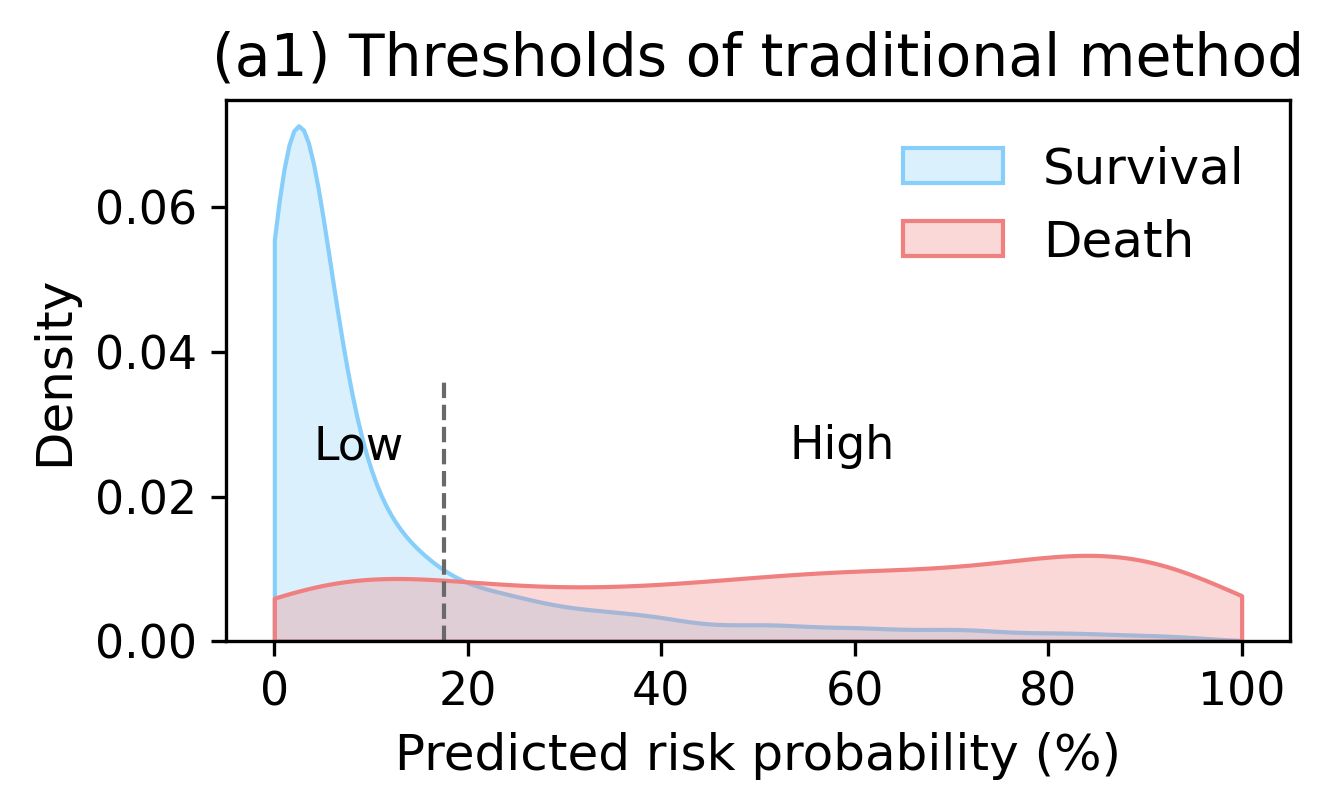

In [ ]:
#### a1: Probability density plot + threshold line ####
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

# Select database H2
# db_name = 'H2'
db_info = db_mapping[db_name]  # Get database information
db = db_info['db']  # Database name
thr1 = db_info['thr1']  # Low-risk threshold
thr2 = db_info['thr2']  # High-risk threshold
thr_mid1 = min_thr_medium  # Lower bound of Medium (+)
thr_mid2 = min_thr_high    # Lower bound of Medium (++)
max_density = db_info['max_density']  # Maximum density for plotting
thr0 = best_thrs_mapping[db_name]  # Youden optimal threshold

# Modify data path
cd = r'./'
search_path1 = cd + '5-final_model/' + db + '/'  # Model results path

# Read prediction results
pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result.csv')

# Predicted probabilities for death and survival
death = pred_result[pred_result['y_test'] == 1]['y_tepred'] * 100
survival = pred_result[pred_result['y_test'] == 0]['y_tepred'] * 100

# Create single subplot
fig, ax = plt.subplots(figsize=(4.5, 2.8), dpi=300)

# Plot KDE curves
sns.kdeplot(survival, color="lightskyblue", fill=True, label="Survival", alpha=0.3, clip=(0, 100), ax=ax)
sns.kdeplot(death, color="lightcoral", fill=True, label="Death", alpha=0.3, clip=(0, 100), ax=ax)

# Draw a single dashed threshold line using thr0
threshold = thr0 * 100
ax.plot([threshold, threshold], [0, max_density/2 * 1.2], linestyle="--", color="dimgray", linewidth=1)

# Add only two text labels for L and H
labels = ['Low', 'High']
text_thresholds = [
    threshold / 2,       # L: midpoint left of thr0
    (threshold + 100) / 2  # H: midpoint between thr0 and 100%
]

for threshold_text, label in zip(text_thresholds, labels):
    ax.text(threshold_text, max_density / 2, label, ha="center", va="top", color="black", fontsize=11)

# Set labels and title
ax.set_xlabel("Predicted risk probability (%)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
if db_name == 'H3':
    ax.set_title(f"(b1) Thresholds of traditional method", fontsize=14)
else:
    ax.set_title(f"(a1) Thresholds of traditional method", fontsize=14)

# Legend
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Set x and y axis tick label sizes
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

# Adjust layout
plt.tight_layout()

# Show figure
plt.show()


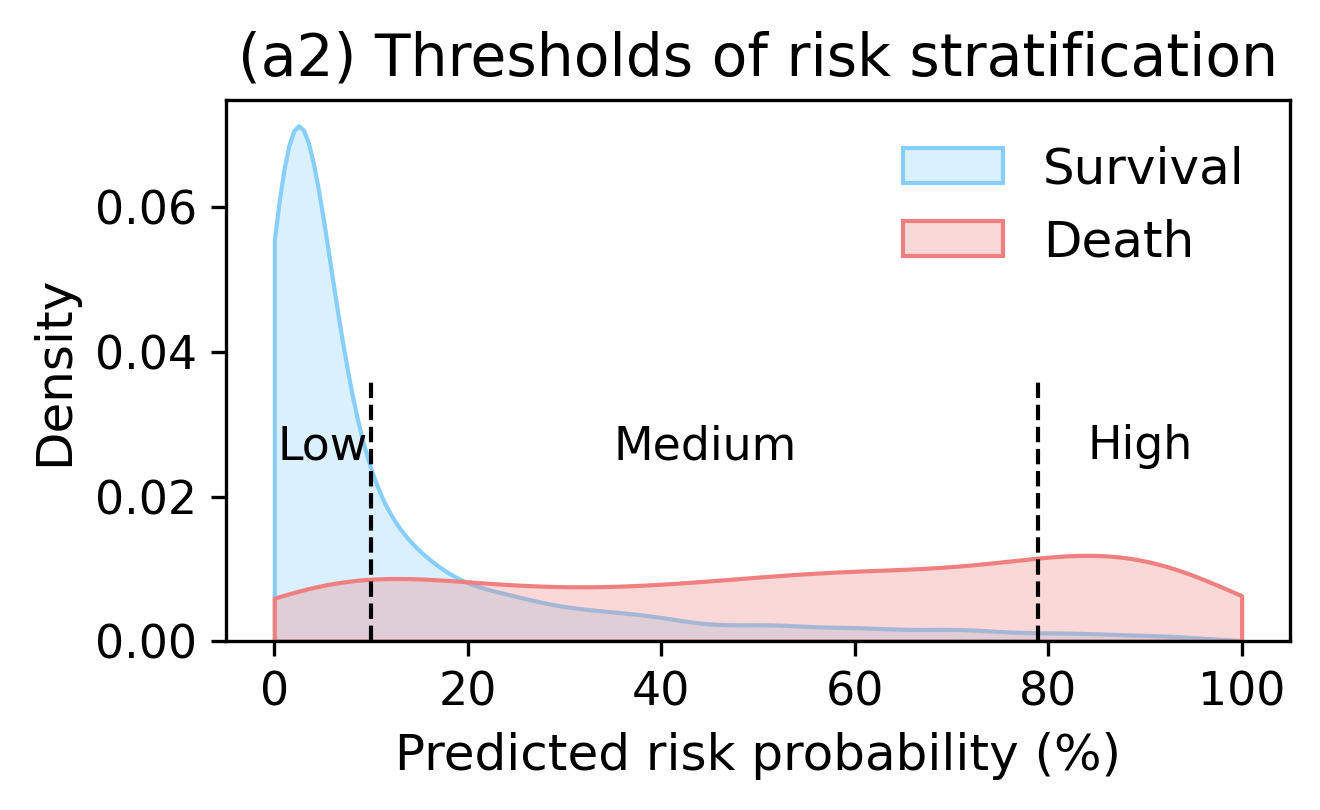

In [ ]:
#### a2: Probability density plot + threshold lines ####
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

# Select database H2
# db_name = 'H2'
db_info = db_mapping[db_name]  # Get database information
db = db_info['db']  # Database name
thr1 = db_info['thr1']  # Low-risk threshold
thr2 = db_info['thr2']  # High-risk threshold
thr_mid1 = min_thr_medium  # Lower bound of Medium (+)
thr_mid2 = min_thr_high    # Lower bound of Medium (++)
max_density = db_info['max_density']  # Maximum density for plotting

# Modify data path
cd = r'./'
search_path1 = cd + '5-final_model/' + db + '/'  # Model results path

# Read prediction results
pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result.csv')

# Predicted probabilities for death and survival
death = pred_result[pred_result['y_test'] == 1]['y_tepred'] * 100
survival = pred_result[pred_result['y_test'] == 0]['y_tepred'] * 100

# Create single subplot
fig, ax = plt.subplots(figsize=(4.5, 2.8), dpi=300)

# Plot KDE curves
sns.kdeplot(survival, color="lightskyblue", fill=True, label="Survival", alpha=0.3, clip=(0, 100), ax=ax)
sns.kdeplot(death, color="lightcoral", fill=True, label="Death", alpha=0.3, clip=(0, 100), ax=ax)

# Draw two dashed threshold lines
thresholds = [thr1 * 100, thr2 * 100]
for i, threshold in enumerate(thresholds):
    ax.plot([threshold, threshold], [0, max_density/2 * 1.2], linestyle="--", color="black", linewidth=1)

# Add three text labels for Low, Medium, High
labels = ['Low', 'Medium', 'High']
text_thresholds = [
    thr1 * 100 / 2,             # L: midpoint left of thr1
    (thr1 * 100 + thr2 * 100) / 2,  # M: midpoint between thr1 and thr2
    (thr2 * 100 + 100) / 2          # H: midpoint between thr2 and 100%
]

for threshold, label in zip(text_thresholds, labels):
    ax.text(threshold, max_density / 2, label, ha="center", va="top", color="black", fontsize=11)

# Set labels and title
ax.set_xlabel("Predicted risk probability (%)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
if db_name == 'H3':
    ax.set_title(f"(b2) Thresholds of risk stratification", fontsize=14)
else:
    ax.set_title(f"(a2) Thresholds of risk stratification", fontsize=14)

# Legend
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Set x and y axis tick label sizes
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

# Adjust layout
plt.tight_layout()

# Show figure
plt.show()


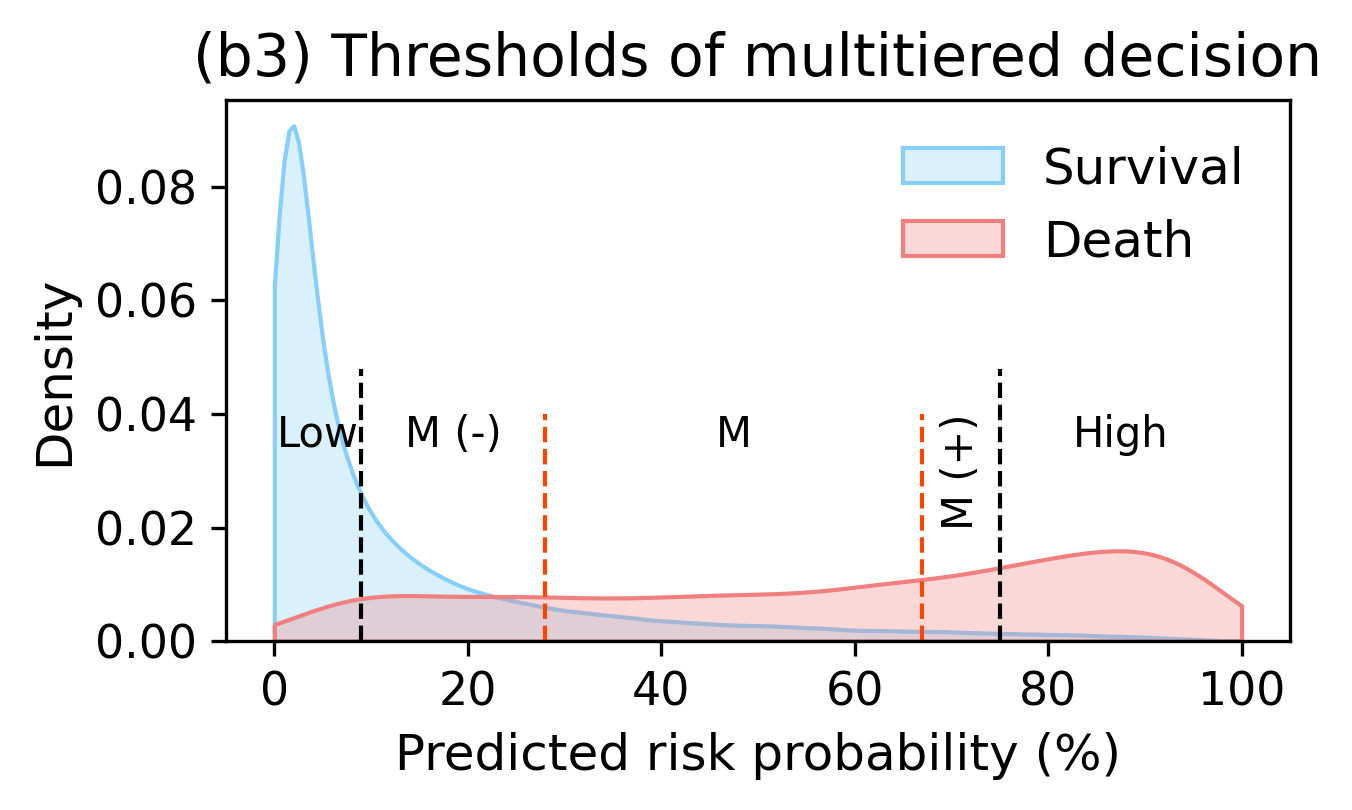

In [ ]:
#### a3: Probability density plot + threshold lines ####
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

# Select database
# db_name = 'H2'
db_info = db_mapping[db_name]  # Get database information
db = db_info['db']  # Database name
thr1 = db_info['thr1']  # Low-risk threshold
thr2 = db_info['thr2']  # High-risk threshold
thr_mid1 = min_thr_medium  # Lower bound of Medium (+)
thr_mid2 = min_thr_high    # Lower bound of Medium (++)
max_density = db_info['max_density']  # Maximum density for plotting

# Modify data path
cd = r'./'
search_path1 = cd + '5-final_model/' + db + '/'  # Model results path

# Read prediction results
pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result.csv')

# Predicted probabilities for death and survival
death = pred_result[pred_result['y_test'] == 1]['y_tepred'] * 100
survival = pred_result[pred_result['y_test'] == 0]['y_tepred'] * 100

# Create single subplot
fig, ax = plt.subplots(figsize=(4.5, 2.8), dpi=300)

# Plot KDE curves
sns.kdeplot(survival, color="lightskyblue", fill=True, label="Survival", alpha=0.3, clip=(0, 100), ax=ax)
sns.kdeplot(death, color="lightcoral", fill=True, label="Death", alpha=0.3, clip=(0, 100), ax=ax)

# Add threshold dashed lines
thresholds = [thr1 * 100, thr_mid1 * 100, thr_mid2 * 100, thr2 * 100]
for i, threshold in enumerate(thresholds):
    if i == 0 or i == 3:  # Extend first and fourth lines by 10%
        ax.plot([threshold, threshold], [0, max_density/2 * 1.2], linestyle="--", color="black", linewidth=1)
    else:  # Middle two lines in orange color
        ax.plot([threshold, threshold], [0, max_density/2], linestyle="--", color="orangered", linewidth=1)

# Add risk level labels
labels = ['Low', 'M (-)', 'M', 'M (+)','High']
text_thresholds = [
    thr1 * 100 / 2,  # L: midpoint left of thr1
    (thr1 * 100 + thr_mid1 * 100) / 2,  # M (-): midpoint between thr1 and thr_mid1
    (thr_mid1 * 100 + thr_mid2 * 100) / 2,  # M (++): midpoint between thr_mid1 and thr_mid2
    (thr_mid2 * 100 + thr2 * 100) / 2,  # M (+++): midpoint between thr_mid2 and thr2
    (thr2 * 100 + 100) / 2  # H: midpoint between thr2 and 100%
]

for threshold, label in zip(text_thresholds, labels):
    if db_name == 'H3' and label == 'M (+)':
        ax.text(threshold, max_density / 2, label, ha="center", va="top", color="black", fontsize=10, rotation=90)
    else:
        ax.text(threshold, max_density / 2, label, ha="center", va="top", color="black", fontsize=10)

# Set labels and title
ax.set_xlabel("Predicted risk probability (%)", fontsize=12)
ax.set_ylabel("Density", fontsize=12)
if db_name == 'H3':
    ax.set_title(f"(b3) Thresholds of multitiered decision", fontsize=14)
else:
    ax.set_title(f"(a3) Thresholds of multitiered decision", fontsize=14)

# Legend
ax.legend(loc="upper right", frameon=False, fontsize=12)

# Set x and y axis tick label sizes
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

# Adjust layout
plt.tight_layout()

# Show figure
plt.show()


In [ ]:
################################################ Comparison before and after stratification ###########################################

In [ ]:
## Three-level stratification thresholds 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Database name mapping and corresponding thresholds
db_mapping = {
    'H1': {'db': 'GDPH', 'thr1': 0.090, 'thr2': 0.820, 'max_density': 0.06}, # Relative net benefit is positive
    'H2': {'db': 'SZBA', 'thr1': 0.100, 'thr2': 0.790, 'max_density': 0.06},  # Relative net benefit is positive
    'H3': {'db': 'MIMIC', 'thr1': 0.090, 'thr2': 0.750, 'max_density': 0.08},  # Relative net benefit is positive
}

# List of database names
db_names = ['H1', 'H2', 'H3']

# Update data paths
cd = r'./'
cd2 = r'./7-SZBA_prospective/'  

db_name = 'H2'  # Select database name (change to one of H1, H2, H3)
# title_num = 'b' # Prefix for chart title, e.g., b, c, d, e
is_external = False # Whether it is external data

db_info = db_mapping[db_name]  # Get info for the selected database
db = db_info['db']  # Database name
thr1 = db_info['thr1']  # Threshold 1
thr2 = db_info['thr2']  # Threshold 2
max_density = db_info['max_density']  # Maximum density for plotting

if db_name == 'H2':
    search_path1 = cd2 + '7.5-final_model/' + db + '/'  # Model results path
else:
    search_path1 = cd + '5-final_model/' + db + '/'  # Model results path

if is_external and db_name == 'H2':
    pred_result = pd.read_csv(search_path1+'predict_5CV/alldata/predict_result_time_2.csv')
else:
    pred_result = pd.read_csv(search_path1 + 'predict_5CV/alldata/predict_result.csv')

#### Filter out the medium-risk subset
risk_2 = pred_result[(pred_result['y_tepred']>thr1)&(pred_result['y_tepred']<=thr2)] ## Medium-risk


In [ ]:
#### Subdivide medium-risk into Medium (+), Medium (++), and Medium (+++)
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
import warnings
warnings.filterwarnings("ignore")

best_thrs_mapping = {'H1': 0.200, 'H2': 0.175, 'H3': 0.225}  # Youden's optimal threshold

IHM_mapping = {'H1': 0.94/100, 'H2': 0.63/100, 'H3': 0.29/100}  # IHM proportion for low-medium risk in three-level stratification
risk_2['is_death'] =  risk_2['y_tepred'].apply(lambda x: 1 if x > best_thrs_mapping.get(db_name) else 0)  # Initial predicted label

# Define threshold ranges for subdividing medium risk
start_mid = thr1
end_mid = thr2
step_mid = (end_mid - start_mid) / 3  # Divide the medium-risk interval into three segments

# Calculate subdivision thresholds
thr_mid1 = start_mid + step_mid  # Upper limit of Medium (+)
thr_mid2 = start_mid + 2 * step_mid  # Upper limit of Medium (++)

# Initialize result storage: low-medium risk (M- or L+)
mid_low_results = pd.DataFrame()  ## Low-medium

# Iterate over possible thresholds in the medium-risk interval: find threshold for Medium (+)
for thr in np.arange(start_mid+0.01, end_mid, 0.01):  # Step size 0.01, can be adjusted
    # Medium (+): y_tepred <= current threshold
    subset_mid1 = risk_2[risk_2['y_tepred'] <= thr]
    r_mid1 = pd.DataFrame({'Thr': [thr]})

    # Calculate proportion of true labels = 1
    if len(subset_mid1) > 0:
        true_positive_rate = subset_mid1['y_test'].sum() / len(subset_mid1)
    else:
        true_positive_rate = 0.0

    # Add proportion info to results
    r_mid1['N'] = len(subset_mid1)
    r_mid1['Total N of Medium'] = len(risk_2)
    r_mid1['Proportion of Medium'] = len(subset_mid1) / len(risk_2)
    r_mid1['Death'] = subset_mid1['y_test'].sum()
    r_mid1['IHM'] = true_positive_rate

    # Merge results
    mid_low_results = pd.concat([mid_low_results, r_mid1], ignore_index=True)

print(mid_low_results)
print(mid_low_results[mid_low_results['Proportion of Medium'] > 0.6]) ## Medium-low accounts for 60% of medium risk
min_thr_medium = round(mid_low_results[mid_low_results['Proportion of Medium'] > 0.6]['Thr'].min(),2)
print(f"Low-medium risk (M- or L+) threshold value: {min_thr_medium}")
if is_external and db_name == 'H2':
    min_thr_medium = 0.30 # For external data, use H2 result directly as low-medium risk threshold


     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
0   0.11   142               2531              0.056104      6  0.042254
1   0.12   271               2531              0.107072      7  0.025830
2   0.13   400               2531              0.158040      9  0.022500
3   0.14   503               2531              0.198736     11  0.021869
4   0.15   613               2531              0.242197     13  0.021207
..   ...   ...                ...                   ...    ...       ...
63  0.74  2463               2531              0.973133    143  0.058059
64  0.75  2480               2531              0.979850    147  0.059274
65  0.76  2488               2531              0.983011    151  0.060691
66  0.77  2507               2531              0.990518    155  0.061827
67  0.78  2518               2531              0.994864    158  0.062748

[68 rows x 6 columns]
     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
19  0.30  1523              

In [ ]:
# Initialize result storage: medium-high risk (M+ or H-)
mid_high_results = pd.DataFrame()  ## Medium-high

# Iterate over possible thresholds in the medium-risk interval: find threshold for Medium (+)
for thr in np.arange(start_mid+0.01, end_mid-0.01, 0.01):  # Step size 0.01, can be adjusted
    # Medium (+): y_tepred > current threshold
    subset_mid1 = risk_2[risk_2['y_tepred'] > thr]
    # r_mid1 = index_calc(thr, subset_mid1['y_test'], subset_mid1['y_tepred'], subset_mid1['is_death'], pos_label=1)
    r_mid1 = pd.DataFrame({'Thr': [thr]})

    # Calculate proportion of true labels = 1
    if len(subset_mid1) > 0:
        true_positive_rate = subset_mid1['y_test'].sum() / len(subset_mid1)
    else:
        true_positive_rate = 0.0

    # Add proportion info to results
    r_mid1['N'] = len(subset_mid1)
    r_mid1['Total N of Medium'] = len(risk_2)
    r_mid1['Proportion of Medium'] = len(subset_mid1) / len(risk_2)
    r_mid1['Death'] = subset_mid1['y_test'].sum()
    r_mid1['IHM'] = true_positive_rate
    
    # r_mid1['Risk_Level'] = 'medium (+)'

    # Merge results
    mid_high_results = pd.concat([mid_high_results, r_mid1], ignore_index=True)

print(mid_high_results)
print(mid_high_results[mid_high_results['IHM'] > 0.2]) ## Medium-high IHM greater than 20%, i.e., PPV > 20%
if len(mid_high_results[mid_high_results['IHM'] > 0.2]) > 0:
    min_thr_high = round(mid_high_results[mid_high_results['IHM'] > 0.2]['Thr'].min(),2)
else:
    min_thr_high = round(mid_high_results[mid_high_results['IHM'] > 0.15]['Thr'].min(),2)
    
if is_external and db_name == 'H2':
    min_thr_high = 0.57  # For external data, use H2 result directly as medium-high risk threshold

# print(mid_high_results[mid_high_results['Thr']>min_thr_medium])
print(f"Medium-high risk (M+ or H-) threshold value: {min_thr_high}")


     Thr     N  Total N of Medium  Proportion of Medium  Death       IHM
0   0.11  2389               2531              0.943896    156  0.065299
1   0.12  2260               2531              0.892928    155  0.068584
2   0.13  2131               2531              0.841960    153  0.071797
3   0.14  2028               2531              0.801264    151  0.074458
4   0.15  1918               2531              0.757803    149  0.077685
..   ...   ...                ...                   ...    ...       ...
62  0.73    82               2531              0.032398     22  0.268293
63  0.74    68               2531              0.026867     19  0.279412
64  0.75    51               2531              0.020150     15  0.294118
65  0.76    43               2531              0.016989     11  0.255814
66  0.77    24               2531              0.009482      7  0.291667

[67 rows x 6 columns]
     Thr    N  Total N of Medium  Proportion of Medium  Death       IHM
46  0.57  288               2

高风险中真实分类为IHM=1： 209
高风险： 1894


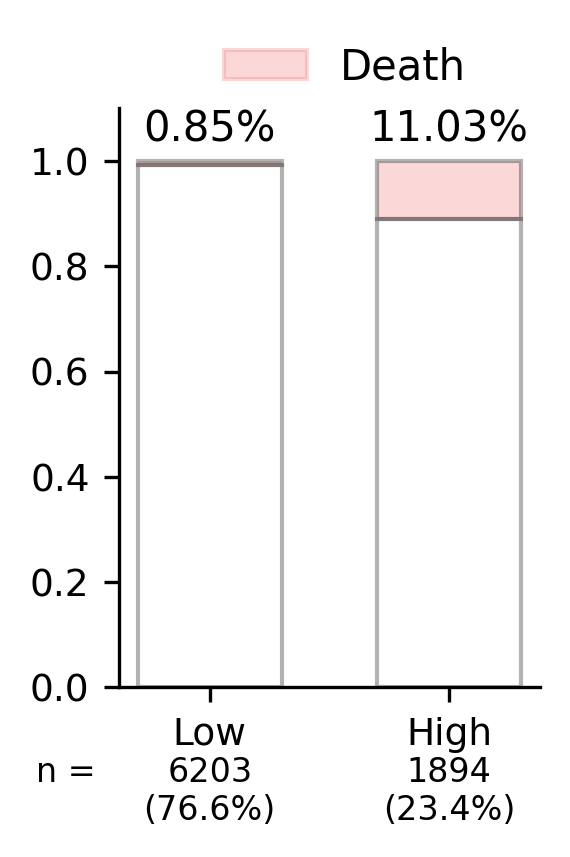

In [ ]:
# Initial model classification threshold, Youden index
# thr0 = 0.225  # best_thrs_mapping[db_name]  # IHM proportion for low-medium risk in three-level stratification
thr0 = best_thrs_mapping[db_name]

# Distribution of initial model predictions
model_pred_0 = pred_result[pred_result['y_tepred'] <= thr0]  # Low risk: predicted survival
model_pred_1 = pred_result[pred_result['y_tepred'] > thr0]   # High risk: predicted death
model_class_n = [len(model_pred_0), len(model_pred_1)]
class_prop = [round(len(model_pred_0) / len(pred_result) * 100,1), round(len(model_pred_1) / len(pred_result) * 100,1)]

# Proportion (%) of true IHM=1 in predicted low-risk group
model_prop_0 = round(len(model_pred_0[model_pred_0['y_test'] == 1]) / len(model_pred_0) * 100, 2)
# Proportion (%) of true IHM=1 in predicted high-risk group
model_prop_1 = round(len(model_pred_1[model_pred_1['y_test'] == 1]) / len(model_pred_1) * 100, 2)
model_death_prop = [model_prop_0, model_prop_1]
print('Number of true IHM=1 in high-risk group:', len(model_pred_1[model_pred_1['y_test'] == 1]))
print('High-risk group size:', len(model_pred_1))

# X-axis positions for each category (only first and last)
x1 = [0, 0.5]  # Fixed positions for two bars

# Plotting
fig, ax1 = plt.subplots(figsize=(2, 2.6), dpi=300)

# Model prediction plot with split-color bars
bar_width = 0.3  # Fixed bar width
for i, (val, n) in enumerate(zip(model_death_prop, [model_class_n[0], model_class_n[1]])):
    # Draw bars
    ax1.bar(x1[i], 100 - val, width=bar_width, color="white", edgecolor="black", alpha=0.3)
    ax1.bar(x1[i], val, bottom=100 - val, width=bar_width, color="lightcoral", edgecolor="black", alpha=0.3)
    # Add percentage text on top of bars
    ax1.text(x1[i], 102, f"{val}%", ha='center', va='bottom', fontsize=10)

# Set Y-axis and X-axis
ax1.set_ylim(0, 110)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_yticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=9)
ax1.set_xticks(x1)
ax1.set_xticklabels([f"Low", f"High"], fontsize=9)

for i, n in enumerate(model_class_n):
    ax1.text(x1[i], -13, f"{n}\n({class_prop[i]}%)", ha='center', va='top', fontsize=8)
# Add "n=" text in bottom-left corner
ax1.text(-0.3, -13,"n =", ha='center', va='top', fontsize=8)

# ax1.set_ylabel("IHM", fontsize=9)
## Add with Visio if needed
# ax1.text(0.2, -27, f"({title_num}1) Traditional method in {db_name}", ha='center', va='top', fontsize=10)

# Remove top and right spines for Model prediction plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add legend
death_patch = mpatches.Patch(color="lightcoral", label="Death", alpha=0.3)
fig.legend(handles=[death_patch], loc="lower center", bbox_to_anchor=(0.6, 0.92), fontsize=10, frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


高风险中真实分类为IHM=1： 66
高风险： 163


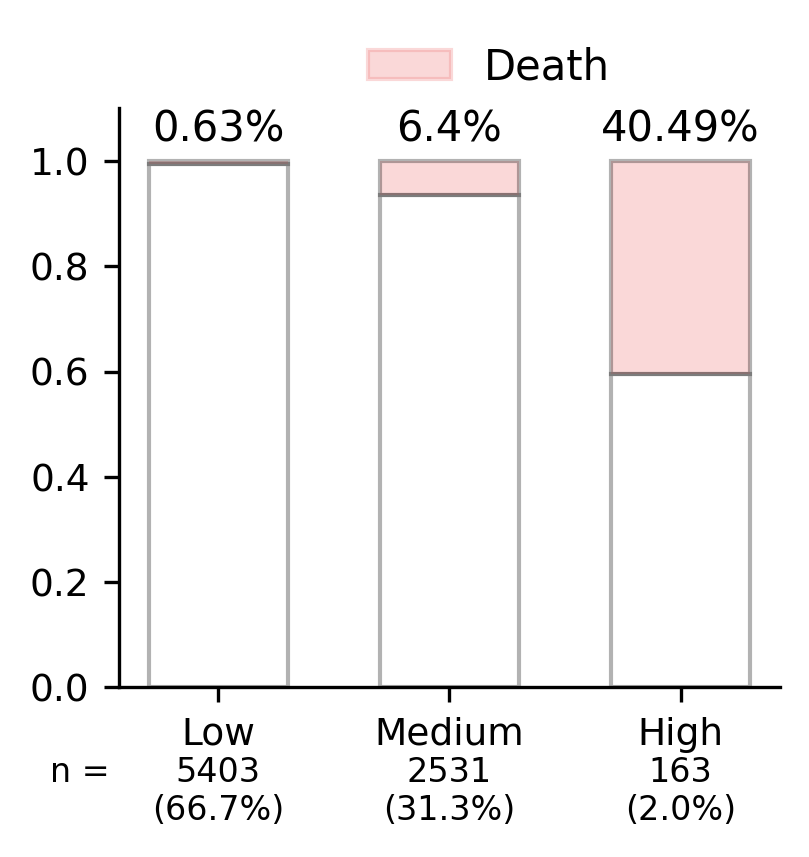

In [ ]:
db_info = db_mapping[db_name]  # Get the corresponding database information
thr1 = db_info['thr1']  # Get thr1
thr2 = db_info['thr2']  # Get thr2

## Risk category labels
categories = ["Low", "Medium", "High"]  # Categories corresponding to the three bars

## Risk-stratified data distribution
risk_1 = pred_result[pred_result['y_tepred'] <= thr1]  # Low risk
risk_2 = pred_result[(pred_result['y_tepred'] > thr1) & (pred_result['y_tepred'] <= thr2)]  # Medium risk
risk_3 = pred_result[pred_result['y_tepred'] > thr2]  # High risk
risk_class_n = [len(risk_1), len(risk_2), len(risk_3)]

## Proportion (%) of true IHM=1 in each risk category
risk_prop_1 = round(len(risk_1[risk_1['y_test'] == 1]) / len(risk_1) * 100, 2) if len(risk_1) > 0 else 0
risk_prop_2 = round(len(risk_2[risk_2['y_test'] == 1]) / len(risk_2) * 100, 2) if len(risk_2) > 0 else 0
risk_prop_3 = round(len(risk_3[risk_3['y_test'] == 1]) / len(risk_3) * 100, 2) if len(risk_3) > 0 else 0
risk_death_prop = [risk_prop_1, risk_prop_2, risk_prop_3]
print('Number of true IHM=1 in high-risk group:', len(risk_3[risk_3['y_test'] == 1]))
print('High-risk group size:', len(risk_3))

class_prop = [round(len(risk_1) / len(pred_result) * 100, 1), 
              round(len(risk_2) / len(pred_result) * 100, 1), 
              round(len(risk_3) / len(pred_result) * 100, 1)]

# Fixed bar width
bar_width = 0.3

# Dynamically compute X-axis positions
num_bars = len(categories)  # Number of bars
x1 = np.linspace(0, (num_bars - 1) * 0.5, num_bars)  # Adjust bar positions dynamically, fixed spacing = 0.5

# Dynamically adjust figure width
fig_width = 2 + (num_bars - 2) * 0.8  # Base width 2, add 0.8 per extra bar
fig, ax1 = plt.subplots(figsize=(fig_width, 2.6), dpi=300)

# Draw bar chart
for i, (val, n) in enumerate(zip(risk_death_prop, risk_class_n)):
    # Draw bars
    ax1.bar(x1[i], 100 - val, width=bar_width, color="white", edgecolor="black", alpha=0.3)
    ax1.bar(x1[i], val, bottom=100 - val, width=bar_width, color="lightcoral", edgecolor="black", alpha=0.3)
    # Add percentage text on top of bars
    ax1.text(x1[i], 102, f"{val}%", ha='center', va='bottom', fontsize=10)

# Set Y-axis
ax1.set_ylim(0, 110)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_yticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=9)
# ax1.set_ylabel("IHM", fontsize=9)

# Set X-axis
ax1.set_xticks(x1)
ax1.set_xticklabels(categories, fontsize=9)

# Add n= info below X-axis
for i, n in enumerate(risk_class_n):
    ax1.text(x1[i], -13, f"{n}\n({class_prop[i]}%)", ha='center', va='top', fontsize=8)

# Add "n=" text in bottom-left corner
ax1.text(-0.3, -13, "n =", ha='center', va='top', fontsize=8)

# Add title: use Visio if needed
# ax1.text(np.mean(x1), -27, "(d2) Risk stratification", ha='center', va='top', fontsize=10)
# ax1.text(np.mean(x1), -27, f"({title_num}2) Risk stratification in {db_name}", ha='center', va='top', fontsize=10)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add legend
death_patch = mpatches.Patch(color="lightcoral", label="Death", alpha=0.3)
fig.legend(handles=[death_patch], loc="lower center", bbox_to_anchor=(0.6, 0.92), fontsize=10, frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()


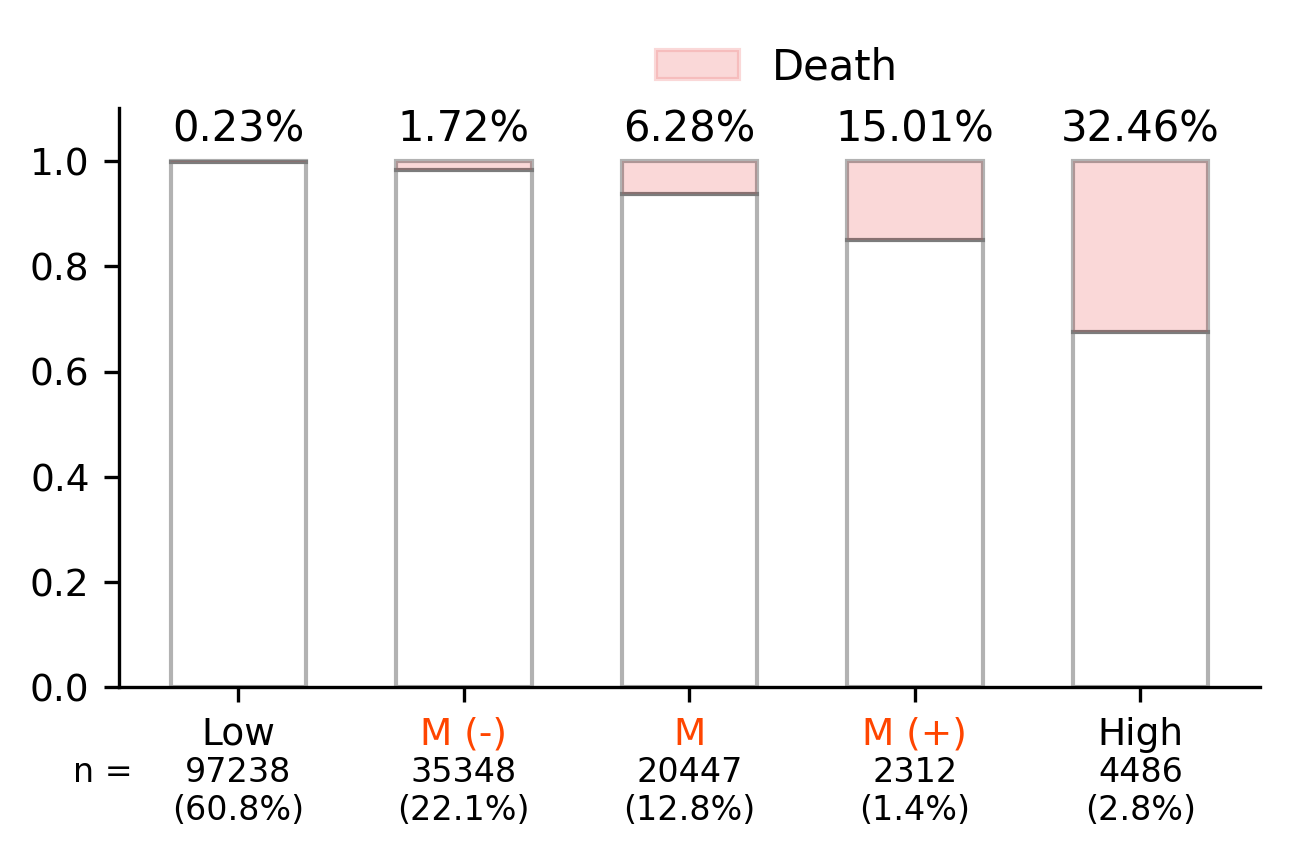

In [ ]:
db_info = db_mapping[db_name]  # Get the corresponding database information
thr1 = db_info['thr1']  # Get thr1
thr2 = db_info['thr2']  # Get thr2

## Medium-risk subdivision thresholds: 0.33, 0.70
thr_mid1 = min_thr_medium  # Lower limit of Medium (+)
thr_mid2 = min_thr_high    # Lower limit of Medium (++)

categories = ["Low", "M (-)", "M", "M (+)", "High"]  # Categories corresponding to the five bars

## Risk-stratified data distribution
risk_1 = pred_result[pred_result['y_tepred'] <= thr1]  # Low risk
risk_2 = pred_result[(pred_result['y_tepred'] > thr1) & (pred_result['y_tepred'] <= thr_mid1)]  # Medium (-)
risk_3 = pred_result[(pred_result['y_tepred'] > thr_mid1) & (pred_result['y_tepred'] <= thr_mid2)]  # Medium
risk_4 = pred_result[(pred_result['y_tepred'] > thr_mid2) & (pred_result['y_tepred'] <= thr2)]  # Medium (+)
risk_5 = pred_result[pred_result['y_tepred'] > thr2]  # High risk
risk_class_n = [len(risk_1), len(risk_2), len(risk_3), len(risk_4), len(risk_5)]  # Sample size per risk category

## Proportion (%) of true IHM=1 in each category
risk_prop_1 = round(len(risk_1[risk_1['y_test'] == 1]) / len(risk_1) * 100, 2) if len(risk_1) > 0 else 0
risk_prop_2 = round(len(risk_2[risk_2['y_test'] == 1]) / len(risk_2) * 100, 2) if len(risk_2) > 0 else 0    
risk_prop_3 = round(len(risk_3[risk_3['y_test'] == 1]) / len(risk_3) * 100, 2) if len(risk_3) > 0 else 0
risk_prop_4 = round(len(risk_4[risk_4['y_test'] == 1]) / len(risk_4) * 100, 2) if len(risk_4) > 0 else 0
risk_prop_5 = round(len(risk_5[risk_5['y_test'] == 1]) / len(risk_5) * 100, 2) if len(risk_5) > 0 else 0
risk_death_prop = [risk_prop_1, risk_prop_2, risk_prop_3, risk_prop_4, risk_prop_5]  # Death proportion (%) per risk category
class_prop = [round(len(risk_1) / len(pred_result) * 100, 1), 
              round(len(risk_2) / len(pred_result) * 100, 1), 
              round(len(risk_3) / len(pred_result) * 100, 1), 
              round(len(risk_4) / len(pred_result) * 100, 1), 
              round(len(risk_5) / len(pred_result) * 100, 1)]  # Proportion of total samples per category

# Fixed bar width
bar_width = 0.3

# Dynamically compute X-axis positions
num_bars = len(categories)  # Number of bars
x1 = np.linspace(0, (num_bars - 1) * 0.5, num_bars)  # Adjust bar positions dynamically, spacing = 0.5

# Dynamically adjust figure width
fig_width = 2 + (num_bars - 2) * 0.8  # Base width 2, add 0.8 per extra bar
fig, ax1 = plt.subplots(figsize=(fig_width, 2.6), dpi=300)

# Draw bar chart
for i, (val, n) in enumerate(zip(risk_death_prop, risk_class_n)):
    # Draw bars
    ax1.bar(x1[i], 100 - val, width=bar_width, color="white", edgecolor="black", alpha=0.3)
    ax1.bar(x1[i], val, bottom=100 - val, width=bar_width, color="lightcoral", edgecolor="black", alpha=0.3)
    # Add percentage text on top of bars
    ax1.text(x1[i], 102, f"{val}%", ha='center', va='bottom', fontsize=10)

# Set Y-axis
ax1.set_ylim(0, 110)
ax1.set_yticks([0, 20, 40, 60, 80, 100])
ax1.set_yticklabels(["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"], fontsize=9)

# Set X-axis
ax1.set_xticks(x1)
# Set all labels to black first
ax1.set_xticklabels(categories, fontsize=9, color="black")
# Set "M (-)", "M", "M (+)" to orangered
for i, cat in enumerate(categories):
    if cat in ["M (-)", "M", "M (+)"]:
        ax1.get_xticklabels()[i].set_color("orangered")

# Add n= info below X-axis
for i, n in enumerate(risk_class_n):
    ax1.text(x1[i], -13, f"{n}\n({class_prop[i]}%)", ha='center', va='top', fontsize=8)

# Add "n=" text in bottom-left corner
ax1.text(-0.3, -13, "n =", ha='center', va='top', fontsize=8)

# Add title: use Visio if needed
# ax1.text(np.mean(x1), -27, "(d3) Multitiered decision", ha='center', va='top', fontsize=10)
# ax1.text(np.mean(x1), -27, f"({title_num}3) Multitiered decision in {db_name}", ha='center', va='top', fontsize=10)

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Add legend
death_patch = mpatches.Patch(color="lightcoral", label="Death", alpha=0.3)
fig.legend(handles=[death_patch], loc="lower center", bbox_to_anchor=(0.6, 0.92), fontsize=10, frameon=False)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()
